<a href="https://colab.research.google.com/github/tito-par-tito/sperovada1/blob/master/DRUGMAN_502252.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Exam pictures](https://photos.app.goo.gl/hzMQ2AQ3oZZJq3k39)

Note to the professor:

- In case you need some help with understanding what I wrote during the exam I can help, email me at *titonicola.drugman01@universitadipavia.it*.

- This notebook takes around 8 minutes to run.

- I underlined the differences between the exam in the following code like this: <font color="cyan">Changes with respect to the exam</font>.

- I tried to specify in which page of the exam I wrote about the code. As an example when discussing the ```MinMaxScaler``` I will have a text like: <font color="pink">MinMaxScaler at page 2 (paper 1)</font>.


# 0 - Introduction

In this part called introduction I will load the dataset and focus on the importing. I had some issue related to [Github](https://github.com/tito-par-tito/sperovada1) since it is a new platform for me. Furthermore the file is bigger than 25M and so it is not possible to direclty load it on the website, I was able to upload it by downloading the app on my pc and cloning a folder.

In [ ]:
#!wget -O images_data.zip https://github.com/tito-par-tito/sperovada1/raw/master/images_data.pkl.zip
!wget -O images_data.pkl 'http://frasca.di.unimi.it/images_data.pkl'

--2023-08-25 13:53:09--  http://frasca.di.unimi.it/images_data.pkl
Resolving frasca.di.unimi.it (frasca.di.unimi.it)... 159.149.130.139
Connecting to frasca.di.unimi.it (frasca.di.unimi.it)|159.149.130.139|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://frasca.di.unimi.it/images_data.pkl [following]
--2023-08-25 13:53:10--  https://frasca.di.unimi.it/images_data.pkl
Connecting to frasca.di.unimi.it (frasca.di.unimi.it)|159.149.130.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134290382 (128M)
Saving to: ‘images_data.pkl’

images_data.pkl     100%[===================>] 128.07M  24.9MB/s    in 6.0s    

2023-08-25 13:53:16 (21.4 MB/s) - ‘images_data.pkl’ saved [134290382/134290382]



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import keras
from keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Input,
                                     Dense,
                                     Dropout,
                                     Conv2D,
                                     MaxPooling2D,
                                     Flatten,
    UpSampling2D, BatchNormalization, Activation, LeakyReLU, Reshape)
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from PIL import Image, ImageDraw
from scipy.ndimage import zoom
import zipfile
import os
import itertools
import random

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
"""
# Old method

zip_file_path = "images_data.zip"
extracted_folder = "/content/images_data"

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extracted_folder)

pkl_file_path = os.path.join(extracted_folder, 'images_data.pkl')
data = pd.read_pickle(pkl_file_path)

"""

'\n# Old method\n\nzip_file_path = "images_data.zip"\nextracted_folder = "/content/images_data"\n\nwith zipfile.ZipFile(zip_file_path, "r") as zip_ref:\n    zip_ref.extractall(extracted_folder)\n\npkl_file_path = os.path.join(extracted_folder, \'images_data.pkl\')\ndata = pd.read_pickle(pkl_file_path)\n\n'

In [ ]:
print(os.listdir()) # you should see the file
with open('images_data.pkl', 'rb') as f:
    data=pickle.load(f)

['.config', 'images_data.pkl', 'sample_data']


In [ ]:
images = data['imgs']
labels = data['labels']
bboxes = data['bboxes']

In [ ]:
# Sanity check
print(f"len images: {len(images)} \nlen labels: {len(labels)} \nlen bboxes: {len(bboxes)}")

len images: 223 
len labels: 223 
len bboxes: 223


In [ ]:
images = np.array(images)

In [ ]:
# Since the dataset is ordered by classes I will shuffle the elements. By using random_state = 42 I ensure to have (almost) the same performance every time I run the notebook
images, labels, bboxes = shuffle(images, labels, bboxes, random_state = 42)

The animal in the image is: butterfly


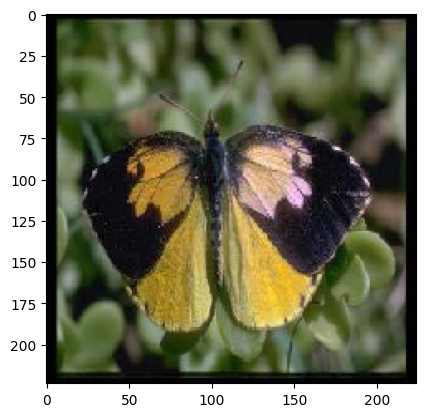

In [ ]:
plt.imshow(images[0].astype('uint8'))
print(f'The animal in the image is: {labels[0]}')



---



# 2 - Input

This section in the exam was divided in two subparts:
* How to (if) preprocess input data and which data would you retain/use;
* Which is the input of the model, and how is it represented;

Here I will divide additionally those sections

### 2.1.1 - MinMaxScaler

Apply **MinMaxScaler** to reduce the range of each RGB value of each pixel from ```[0; 255]``` to ```[0; 1]```.

I will first test the MinMaxScaler on a single image to see if it is working properly, then I will apply it to all the images.

<font color="pink">MinMaxScaler at page 2 (bottom left) (paper 1)</font>.

(224, 224, 3)
Min: 0.0 Max: 255.0


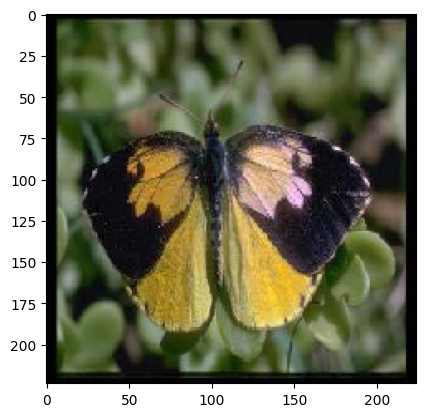

In [ ]:
# Apply MinMaxScaler to A SINGLE image in the set
index = 0
print(images[index].shape)
print(f"Min: {np.min(images[index])} Max: {np.max(images[index])}")
plt.imshow(images[index].astype('uint8'))

(224, 224, 3)
Min: 0.0 Max: 1.0


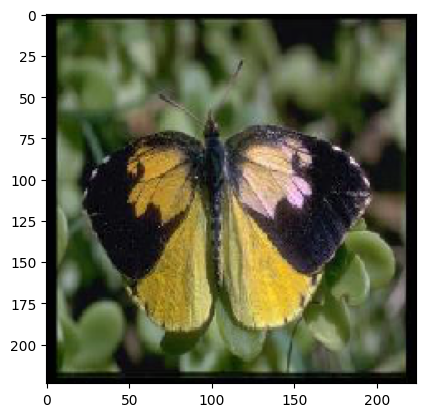

In [ ]:
mmscaler = MinMaxScaler()

reshaped_image = images[index].reshape(-1, 3)
mmscaler.fit(reshaped_image)
scaled_image = mmscaler.transform(reshaped_image).reshape(224, 224, 3)
print(scaled_image.shape)
print(f"Min: {np.min(scaled_image)} Max: {np.max(scaled_image)}")

plt.imshow(scaled_image)

We can see that there is no difference in the shape and the plotted image before and after the ```MinMaxScaler```. So we can apply it to all the images.



In [ ]:
# apply MinMaxScaler to ALL the images in the set
scaled_images = [mmscaler.fit_transform(image.reshape(-1, 3)).reshape(224, 224, 3) for image in images]
scaled_images = np.array(scaled_images)

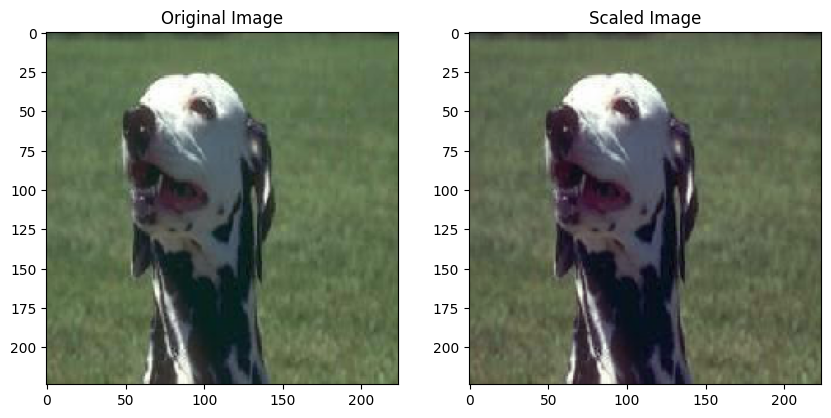

In [ ]:
# PLOT ORIGINAL AND SCALED IMAGE
index = 100
original_image = images[index].astype('uint8')
scaled_image = scaled_images[index]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(scaled_image)
axes[1].set_title("Scaled Image")

plt.show()

In [ ]:
print(f"Min: {np.min(images[0])} Max {np.max(images[0])} \nMin: {np.min(scaled_images[0])} Max {np.max(scaled_images[0])}")

Min: 0.0 Max 255.0 
Min: 0.0 Max 1.0


Note: from now on I will work only on ```scaled_images``` by leaving ```images``` only for some additional comparison. I decide to not replace ```images``` since if I would need to make some changes in the code I would still have the numpy array containing all the original images.

### 2.1.2 - Transform the labels


As stated in the exam I decided to transform the labels in one-hot vectors. This subsection is focused on the transformations I applied on the labels.

<font color="pink">Transform the labels at page 5 (paper 2)</font>.


In [ ]:
unique_classes = np.unique(labels)
num_classes = len(unique_classes)

class_indices = {c: i for i, c in enumerate(unique_classes)}
one_hot_vectors = np.eye(num_classes, dtype=int)
class_to_onehot = {c: one_hot_vectors[i].tolist() for c, i in class_indices.items()}

mapped_labels = np.array([class_to_onehot[label] for label in labels])
y = np.eye(num_classes, dtype=int)

class_list = list(unique_classes)


print(f"There are {num_classes} unique classes")
print("")

for i, class_val in enumerate(class_list):
    print(f"Class: {class_val} -> one-hot vector: {y[i]}")

mapped_labels = np.array(mapped_labels)

There are 3 unique classes

Class: butterfly -> one-hot vector: [1 0 0]
Class: dalmatian -> one-hot vector: [0 1 0]
Class: dolphin -> one-hot vector: [0 0 1]


 dolphin --> [0 0 1]


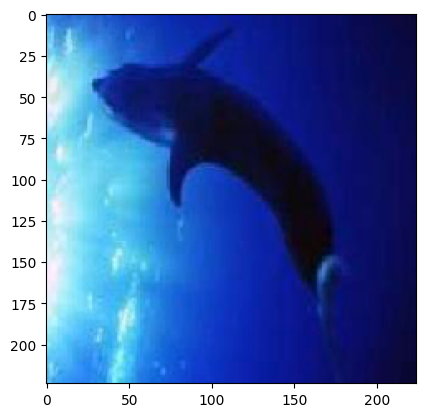

In [ ]:
# Sanity check
index = 200
plt.imshow(scaled_images[index])
print(f" {labels[index]} --> {mapped_labels[index]}")

### 2.1.3 - Boxes

Here I will focus on the bboxes of the target animals inside the images. First of all I tried to overcome the issue of the missing booxes of some images. I first checked how many images where missing their bboxes and then I decided to replace the empty list with the coordinates of the bottom left corner and the upper right corner. Of course there are more efficient solutions but I decide to stick with what I wrote during the exam. Also the animals in the images usually cover the entire images and so a frame big as the entire image might not be such a big issue.

<font color="pink">Issues of missing bboxes at page 4 (second paragraph) (paper 1)</font>.

In [ ]:
print(scaled_images[0].shape[0])

224


In [ ]:
# Check the length of the bboxes
length_freq = {}

for sublist in bboxes:
    sublist_len = len(sublist)
    if sublist_len in length_freq:
        length_freq[sublist_len] += 1
    else:
        length_freq[sublist_len] = 1

print(length_freq)

{4: 195, 0: 28}


In [ ]:
# Replace the empty lists
length_freq = {}

bboxes = [[0, 0, 224, 244] if not sublist else sublist for sublist in bboxes]
for sublist in bboxes:
    length_freq[len(sublist)] = length_freq.get(len(sublist), 0) + 1

print(length_freq)

{4: 223}


So we can see that now all the bboxes have length equal to 4 (as expected).

Additionaly I decided to create the function ```plot_img``` that allows to print the image and the bboxes around the animal. I will call this function multiple times to see what is going on in my project. It is possible to specify to plot the label of the animal inside the image.



In [ ]:
def plot_img(background_image, coords, labels = None):
    height, width, _ = background_image.shape
    plt.figure(figsize=(width / 80, height / 80), dpi=80)
    plt.xlim(0, width)
    plt.ylim(0, height)

    plt.imshow(background_image)

    x1, y1, x2, y2 = coords
    x1 = x1 * width
    y1 = y1 * width
    x2 = x2 * width
    y2 = y2 * width

    plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], c='red')

    dot_size = 20
    plt.scatter(x1, y1, c='red', s=dot_size, marker='o')
    #plt.scatter(x1, y2, c='red', s=dot_size, marker='x')
    plt.scatter(x2, y2, c='red', s=dot_size, marker='o')
    #plt.scatter(x2, y1, c='red', s=dot_size, marker='x')

    if labels is not None:
        plt.text(0, 0, labels, color='red', fontsize=12, verticalalignment='bottom')

    plt.axis('off')
    plt.show()

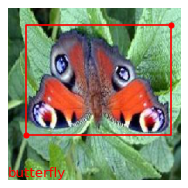

In [ ]:
plot_img(scaled_images[60], bboxes[60], labels[60])

In [ ]:
bboxes = np.array(bboxes)

### 2.1.4 - Autoencoder

As said in the exam I will also build an autoencoder for dimensioanlity reduction of the data. I will apply the autoencoder to all the images in my dataset but I will first split between train and test. Since this task is unsupervised I am not interested in the labels and the bboxes, I will just try to reduce the image size.

Regarding the bboxes, as we know *each component of the vector is in [0, 1], representing the fraction of the width and of the height respectively*, so even if we decrease the image size we do not need to apply any function to change the bboxes of an image.

<font color="pink">Autoencoder at page 3 (paper 1)</font>.

In [ ]:
# Sanity check pt. 1
print(f"Len labels:           {len(labels)} \nLen scaled_images:    {len(scaled_images)} \nLen bboxes:           {len(bboxes)}")

Len labels:           223 
Len scaled_images:    223 
Len bboxes:           223


In [ ]:
X_train_auto, X_test_auto = train_test_split(scaled_images, train_size=0.75, random_state=42, shuffle = False)

In [ ]:
# Sanity check pt. 2
print(f"Len X_train_auto:      {len(X_train_auto)} \nLen X_train_auto[0]:   {X_train_auto[0].shape} \nLen X_test_auto[0]:    {X_test_auto[0].shape} ")

Len X_train_auto:      167 
Len X_train_auto[0]:   (224, 224, 3) 
Len X_test_auto[0]:    (224, 224, 3) 


In [ ]:
input_img = keras.Input(shape=(224, 224, 3))

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(input_img)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_initializer='he_normal')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(3, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(encoded)
#x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', kernel_initializer='he_normal')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

encoder_model = keras.Model(input_img, encoded)
reduced_images = encoder_model.predict(X_train_auto)
reduced_images_test = encoder_model.predict(X_test_auto)

2/2 [==============================] - 1s 1s/step


In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 3)       1731      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 3)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      1792      
                                                             

In [ ]:
autoencoder.fit(X_train_auto, X_train_auto,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test_auto, X_test_auto))

Epoch 1/20
6/6 [==============================] - 12s 647ms/step - loss: 0.1111 - val_loss: 0.0748
Epoch 2/20
6/6 [==============================] - 1s 219ms/step - loss: 0.0791 - val_loss: 0.0628
Epoch 3/20
6/6 [==============================] - 1s 209ms/step - loss: 0.0637 - val_loss: 0.0484
Epoch 4/20
6/6 [==============================] - 1s 210ms/step - loss: 0.0505 - val_loss: 0.0429
Epoch 5/20
6/6 [==============================] - 1s 208ms/step - loss: 0.0405 - val_loss: 0.0346
Epoch 6/20
6/6 [==============================] - 1s 210ms/step - loss: 0.0305 - val_loss: 0.0330
Epoch 7/20
6/6 [==============================] - 1s 210ms/step - loss: 0.0308 - val_loss: 0.0324
Epoch 8/20
6/6 [==============================] - 1s 209ms/step - loss: 0.0244 - val_loss: 0.0232
Epoch 9/20
6/6 [==============================] - 1s 207ms/step - loss: 0.0211 - val_loss: 0.0227
Epoch 10/20
6/6 [==============================] - 1s 211ms/step - loss: 0.0207 - val_loss: 0.0218
Epoch 11/20
6/6 [=

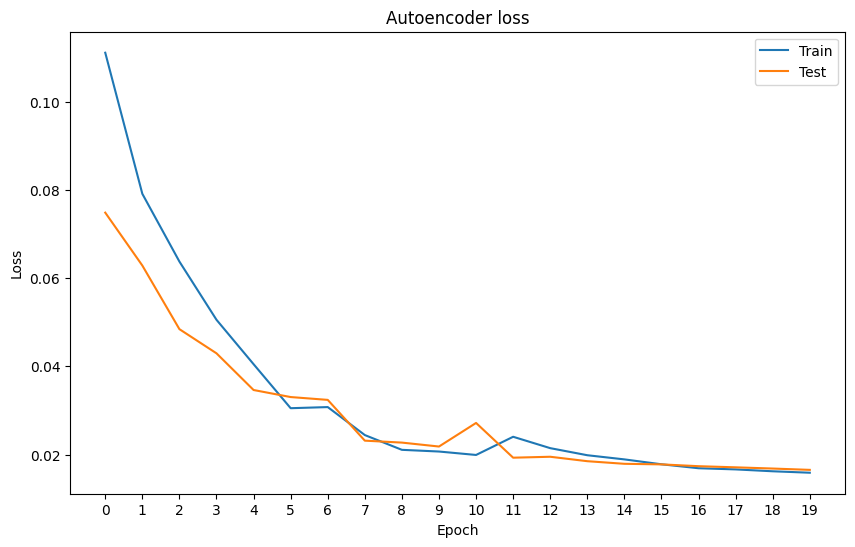

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('Autoencoder loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
num_epochs = len(autoencoder.history.history['loss'])
plt.xticks(range(num_epochs))

plt.show()

Here we can see that the loss of the train and the test converge to 0.02 and so we can use our autoencoder for the dimensioanlity reduction.

In [ ]:
reconst_train = autoencoder.predict(X_train_auto)
reconst_test = autoencoder.predict(X_test_auto)

mse_train = mean_squared_error(X_train_auto.flatten(), reconst_train.flatten())
mse_test = mean_squared_error(X_test_auto.flatten(), reconst_test.flatten())

print(f"Mean Squared Error (MSE) on train: {mse_train}")
print(f"Mean Squared Error (MSE) on test:  {mse_test}")

2/2 [==============================] - 0s 53ms/step
Mean Squared Error (MSE) on train: 0.015798883512616158
Mean Squared Error (MSE) on test:  0.016532670706510544


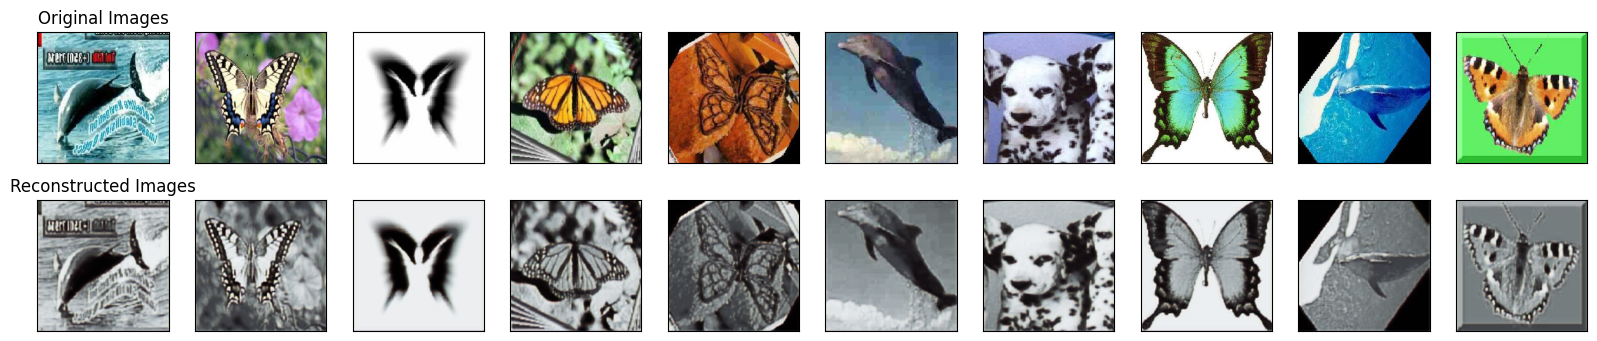

In [ ]:
n = 10  # Number of images to plot (number of columns)
row = 2

plt.figure(figsize=(20, 4))
for i in range(n):

    # Original Images
    ax = plt.subplot(row, n, i + 1)
    plt.imshow(X_test_auto[i].reshape(224, 224, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.subplot(row, n, 1)
    plt.title("Original Images")

    # Reconstructed Images
    ax = plt.subplot(row, n, i + 1 + n)
    plt.imshow(reconst_test[i].reshape(224, 224, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.subplot(row, n, n+1)
    plt.title("Reconstructed Images")

plt.show()

In [ ]:
reduced_images_train = encoder_model.predict(X_train_auto)                              # Create the reduced of train images
reduced_images_test = encoder_model.predict(X_test_auto)                                # Create the reduced of test images
reduced_images = np.concatenate((reduced_images_train, reduced_images_test), axis=0)    # Concatenate the reduced images in a new numpy array

2/2 [==============================] - 0s 27ms/step


In [ ]:
print(" -- Before --")
print(len(scaled_images))
print(scaled_images.shape)
print("-- After --")
print(len(reduced_images))
print(reduced_images.shape)

 -- Before --
223
(223, 224, 224, 3)
-- After --
223
(223, 112, 112, 3)


After saying goodbye to ```images``` is now time to leave ```scaled_images``` and keep only ```reduced_images``` that have a smaller dimension. But those ```reduced_images``` are not yet scaled in the range [0;1] and so we need to apply ```MinMaxScaler```.



In [ ]:
print(f"Min: {np.min(reduced_images[0])} Max {np.max(reduced_images[0])}")

Min: 0.0 Max 1.2723318338394165


In [ ]:
mmscaler = MinMaxScaler()
new_reduced_images = []

for image in reduced_images:
    reshaped_image = image.reshape(-1, 3)
    scaled_image = mmscaler.fit_transform(reshaped_image).reshape(112, 112, 3)
    new_reduced_images.append(scaled_image)

new_reduced_images = np.array(new_reduced_images)
new_reduced_images = np.round(new_reduced_images, decimals=5)  # There was (sometimes) an issue related to the floating-point precision, the maximum was 1.0000001192092896 and not 1.0

In [ ]:
print(f"Min: {np.min(new_reduced_images[0])} Max {np.max(new_reduced_images[0])}")

Min: 0.0 Max 1.0


--- scaled_images[60] ---
The animal in the image is a: butterfly --> [1 0 0]
Shape: (224, 224, 3)
Ratio of coordinates: [0.10666667 0.25945946 0.94333333 0.8972973 ] 


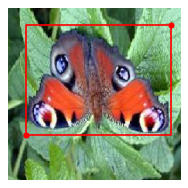



--- new_reduced_images[60] ---
The animal in the image is a: butterfly --> [1 0 0]
Shape: (112, 112, 3)
Ratio of coordinates: [0.10666667 0.25945946 0.94333333 0.8972973 ] 


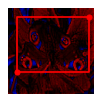

In [ ]:
index = 60
print(f"--- scaled_images[{index}] ---")
print(f"The animal in the image is a: {labels[index]} --> {mapped_labels[index]}")
print(f"Shape: {scaled_images[index].shape}")
print(f"Ratio of coordinates: {bboxes[index]} ")
plot_img(scaled_images[index], bboxes[index])

print("")
print("")

print(f"--- new_reduced_images[{index}] ---")
print(f"The animal in the image is a: {labels[index]} --> {mapped_labels[index]}")
print(f"Shape: {new_reduced_images[index].shape}")
print(f"Ratio of coordinates: {bboxes[index]} ")
plot_img(new_reduced_images[index], bboxes[index])

As said before, *each component* [of the bboxes] *is in [0, 1], representing the fraction of the width and of the height respectively*. So, even if we reduced the image size we do not need to change the values inside bboxes. In the above cell block we can see that everything is going smoothly.

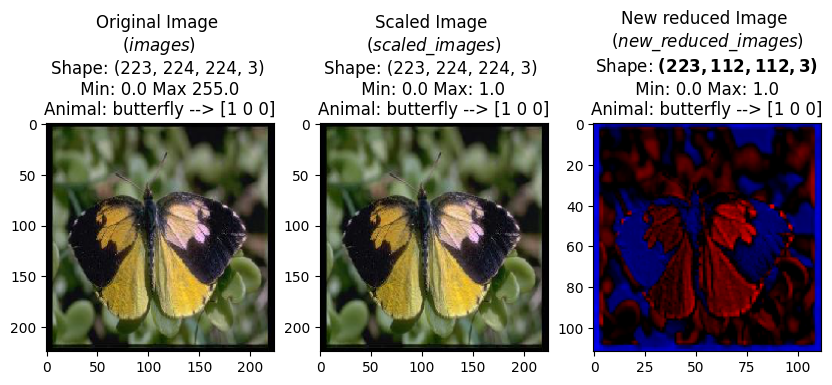

In [ ]:
index = 0
original_image = images[index].astype('uint8')
scaled_image = scaled_images[index]
new_reduced_image = new_reduced_images[index]

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(original_image)
axes[0].set_title(f"Original Image \n($\mathit{{images}}$) \nShape: {images.shape} \n Min: {np.min(images[index])} Max {np.max(images[index])} \nAnimal: {labels[index]} --> {mapped_labels[index]}")
axes[1].imshow(scaled_image)
axes[1].set_title(f"Scaled Image \n($\mathit{{scaled\_images}}$)\nShape: {scaled_images.shape} \n Min: {np.min(scaled_images[index])} Max: {np.max(scaled_images[index])} \nAnimal: {labels[index]} --> {mapped_labels[index]}")
axes[2].imshow(new_reduced_image)
axes[2].set_title(f"New reduced Image \n($\mathit{{new\_reduced\_images}}$)\nShape: $\\mathbf{{{new_reduced_images.shape}}}$ \n Min: {np.min(new_reduced_images[index])} Max: {np.max(new_reduced_images[index])} \nAnimal: {labels[index]} --> {mapped_labels[index]}")

plt.show()

Above we can see the changes I applied to the images so far. We can see that between the first and second image the only change is in ```Max``` because we apply the ```MinMaxScaler``` to "squeeze" all the pixels values in the range [0;1].

While we can see some interesting changes in the colors of the third image what it is important to notice is the fact that the shape is not anymore ```(223,224,224,3)``` but instead it is ```(223,112,112,3)``` this is due to the autoencoder.

### 2.1.5 - Data augmentation

#### 2.1.5.1 - Splitting

Here we apply data augmentation. The most common practice is to apply data augmentation only to the training samples because this helps the model become more robust and better to generalize.

To do so I will split the dataset, but the difference in the splitting between data augmentation and autoencoder is that with data augmentation we need to consider also the labels (since we generate new images) and the bboxes (since by flipping and zooming the images we need to change also the coordinates of the bboxes).

<font color="pink">Augmentation of the images (flipping and zooming) at the end of page 3 and the beginning of page 4 (paper 1)</font>.

In [ ]:
X_train, X_test, y_train, y_test, bboxes_train, bboxes_test = train_test_split(
                  new_reduced_images, mapped_labels, bboxes, train_size=0.75, random_state=42, shuffle=False)

In [ ]:
# I create a copy of the X_train to apply on it the data augmentation (flip and zoom)
X_train_copy_flip = X_train.copy()
# NOTE: I did not create train_bboxes_copy_flip

X_train_copy_zoom = X_train.copy()
bboxes_train_copy_zoom = bboxes_train.copy()

# I will also need to duplicated y_train (more on that later)

#### 2.1.5.2 - Flipping

In [ ]:
# Flip images
def flip_horizontal(array):
    flipped_array = np.fliplr(array)
    return flipped_array

X_train_flipped = np.array([flip_horizontal(img) for img in X_train_copy_flip])

Since we are flipping the images horizontally to obtain the flipped bboxes I just need to change the x-values of both coordinates and to keep the y-values the same. Also since we are working with ratios (that ranges from 0 to 1) I will just need to compute the complementary of the x-values to obtained the flipped bboxes.

In [ ]:
# Flip bboxes

bboxes_train_flipped = []
bboxes_train_flipped = [(1 - c3, c2, 1 - c1, c4) for c1, c2, c3, c4 in bboxes_train]

print(" --- bboxes_train ---")
print(len(bboxes_train))
print(bboxes_train[0])
print("")
print("--- bboxes_train_flipped ---")
print(len(bboxes_train_flipped))
print(bboxes_train_flipped[0])

 --- bboxes_train ---
167
[0.09333333 0.11       0.88666667 0.88      ]

--- bboxes_train_flipped ---
167
(0.11333333333333329, 0.11, 0.9066666666666666, 0.88)


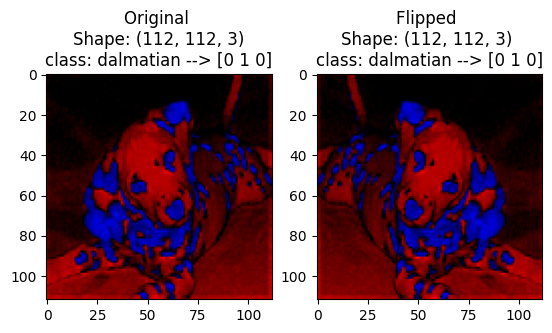

In [ ]:
# Sanity check to see if the flipped images works
index = 90

plt.subplot(1, 2, 1)
plt.imshow(X_train[index])
plt.title(f"Original \nShape: {X_train[index].shape}\nclass: {labels[index]} --> {mapped_labels[index]}")

plt.subplot(1, 2, 2)
plt.imshow(X_train_flipped[index])
plt.title(f"Flipped \nShape: {X_train_flipped[index].shape} \nclass: {labels[index]} --> {mapped_labels[index]}")

plt.show()

#### 2.1.5.3 - Zooming

In [ ]:
def clipped_zoom(img, zoom_factor, **kwargs):
    h, w = img.shape[:2]

    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)
    zh = int(np.round(h / zoom_factor))
    zw = int(np.round(w / zoom_factor))
    top = (h - zh) // 2
    left = (w - zw) // 2
    out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

    trim_top = ((out.shape[0] - h) // 2)
    trim_left = ((out.shape[1] - w) // 2)
    out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    return out



def zoom_images(X_train, zoom_factor, **kwargs):
    num_images, h, w, c = X_train.shape

    zoomed_images = np.empty_like(X_train)
    scaler = MinMaxScaler()

    for i in range(num_images):
        zoomed_images[i] = clipped_zoom(X_train[i], zoom_factor, **kwargs)

        scaled_image = scaler.fit_transform(zoomed_images[i].reshape(-1, c))
        zoomed_images[i] = scaled_image.reshape(h, w, c)

    return zoomed_images


zoom_factor = 1.2
X_train_zoomed = np.round(zoom_images(X_train_copy_zoom, zoom_factor), decimals=5) # there was (sometimes) an issue related to the floating-point precision, the maximum was 1.0000001192092896 and not 1.0

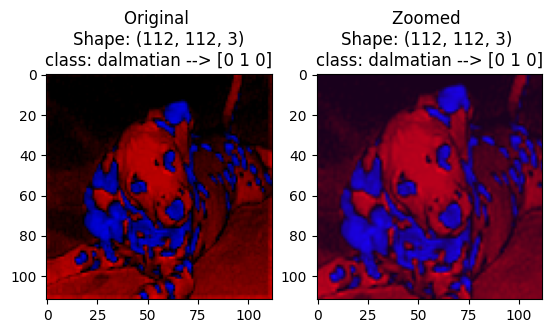

In [ ]:
# Sanity check to see if the zoomed images works
index = 90

plt.subplot(1, 2, 1)

plt.imshow(X_train[index])
plt.title(f"Original \nShape: {X_train[index].shape}\nclass: {labels[index]} --> {mapped_labels[index]}")

plt.subplot(1, 2, 2)
plt.imshow(X_train_zoomed[index])
plt.title(f"Zoomed \nShape: {X_train_zoomed[index].shape} \nclass: {labels[index]} --> {mapped_labels[index]}")

plt.show()

In [ ]:
# Zoom bboxes
def zoom_bboxes(coord_array, zoom_factor=1.2):
    new_bboxes = np.zeros_like(coord_array)

    for i in range(coord_array.shape[0]):
        c1, c2, c3, c4 = coord_array[i]

        orig_width = c3 - c1
        orig_height = c4 - c2

        center_x = c1 + orig_width / 2
        center_y = c2 + orig_height / 2

        new_width = orig_width * zoom_factor
        new_height = orig_height * zoom_factor

        new_c1 = center_x - new_width / 2
        new_c2 = center_y - new_height / 2

        new_c3 = new_c1 + new_width
        new_c4 = new_c2 + new_height

        new_c1 = max(0, min(1, new_c1))
        new_c2 = max(0, min(1, new_c2))
        new_c3 = max(0, min(1, new_c3))
        new_c4 = max(0, min(1, new_c4))

        new_bboxes[i] = [new_c1, new_c2, new_c3, new_c4]

    return new_bboxes

bboxes_train_zoomed = zoom_bboxes(bboxes_train_copy_zoom)

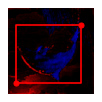

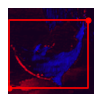

In [ ]:
index = 16
plot_img(X_train[index], bboxes_train[index])
plot_img(X_train_zoomed[index], bboxes_train_zoomed[index])

#### 2.1.5.4 - Merge the augmentation

In [ ]:
# Sanity check to see if the shape stayed the same
print(f"Shape of X_train:              {X_train.shape} \nShape of X_train_flipped:      {X_train_flipped.shape}\nShape of X_train_zoomed:       {X_train_zoomed.shape}")
print("")
print(f"Len of bboxes_train:           {len(bboxes_train)} \nLen of bboxes_train_flipped:   {len(bboxes_train_flipped)}\nLen of bboxes_train_zoomed:    {len(bboxes_train_zoomed)}")

Shape of X_train:              (167, 112, 112, 3) 
Shape of X_train_flipped:      (167, 112, 112, 3)
Shape of X_train_zoomed:       (167, 112, 112, 3)

Len of bboxes_train:           167 
Len of bboxes_train_flipped:   167
Len of bboxes_train_zoomed:    167


In [ ]:
X_train_merged = np.concatenate((X_train, X_train_flipped, X_train_zoomed), axis=0)                      # merge X_train and X_train_flipped
y_train_merged = np.concatenate((y_train, y_train, y_train))                                             # concatenate y_train two times
bboxes_train_merged = np.concatenate((bboxes_train, bboxes_train_flipped, bboxes_train_zoomed), axis=0)  # merge train_bboxes and train_bboxes_flipped

Since we flipped and we zoomed all the images one by one when we create ```X_train_flipped``` and ```X_train_zoomed``` we know that the order of the images will be the same of ```X_train```. Furthermore this is the same with the bboxes, and so the order did not change. So when we concatenate the images to create ```X_train_merged``` and when we concatenate the bboxes to create ```bboxes_train_merged``` we just need to decide if we want to first contatenated the flipped images and than the zoomed one.

Regarding ```y_train``` we did not have any changes and so I decided to concanteate itself three times to create ```y_train_merged```.

In [ ]:
print(X_train_merged.shape)
print(y_train_merged.shape)
print(bboxes_train_merged.shape)

(501, 112, 112, 3)
(501, 3)
(501, 4)


Original image


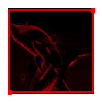

Flipped image


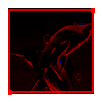

Zoomed image


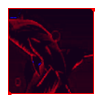

In [ ]:
# Sanity check
index = 80
print("Original image")
plot_img(X_train_merged[index], bboxes_train_merged[index])
print("Flipped image")
plot_img(X_train_merged[index + (int(X_train_merged.shape[0]/3))], bboxes_train_merged[index + (int(X_train_merged.shape[0]/3))])
print("Zoomed image")
plot_img(X_train_merged[index + (int(2*X_train_merged.shape[0]/3))], bboxes_train_merged[index + (int(2*X_train_merged.shape[0]/3))])



---



# 3 - 4 - 5 OUTPUT - LOSS - MODEL CONFIGURATION

This section represents the following three parts:

3. OUTPUT: How would you design the output layer and why;
4. LOSS: Which loss function would you use to train your model and
why;
5. MODEL CONFIGURATION

  * Model composition: composition of layers, regardless their number,
  or their dimension, which can be object of tuning
  * Which activation functions would you use;
  * How (if) would you regularize/initialize your model
  * On which hyperparameters would you perform the model selection (just list them)

In [ ]:
# Define the input dimension
input_shape = (X_train_merged.shape[1], X_train_merged.shape[2], 3)
print(input_shape)

(112, 112, 3)


In [ ]:
# Sanity check of the dimensions
print(f"-- TRAIN --  \nX_train_merged:            {X_train_merged.shape} \ny_train_merged:            {y_train_merged.shape} \nLen bboxes_train_merged:   {len(bboxes_train_merged)} \n")
print(f"-- TEST --  \nX_test:                    {X_test.shape} \ny_test:                    {y_test.shape} \nLen bboxes_test:           {len(bboxes_test)} ")

-- TRAIN --  
X_train_merged:            (501, 112, 112, 3) 
y_train_merged:            (501, 3) 
Len bboxes_train_merged:   501 

-- TEST --  
X_test:                    (56, 112, 112, 3) 
y_test:                    (56, 3) 
Len bboxes_test:           56 


In [ ]:
# Sanity check of the type
print(type(X_train_merged))
print(type(y_train_merged))
print(type(bboxes_train_merged))
print("")
print(type(X_test))
print(type(y_test))
print(type(bboxes_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Sanity check of min, max and labels
print(f"\n Min train: {np.min(X_train_merged[0])}               Max train: {np.max(X_train_merged[0])}")
print(f"\n Min test: {np.min(X_test[0])}                Max test: {np.max(X_test[0])}")
print(f"\n Labels Train (example): {y_train_merged[0]}    Label test (example): {y_test[0]}")


 Min train: 0.0               Max train: 1.0

 Min test: 0.0                Max test: 1.0

 Labels Train (example): [1 0 0]    Label test (example): [0 0 1]


<font color="pink">Output layer at page 4 (paper 1)</font>.

<font color="cyan">Changes with respect to the exam</font>. I wrote in the exam that *the output layer will be a dense MLP layer where the number of neurons are equal to to the number of unique classes of the dayaset plus a concatenation of neurons that returns the predicted + coordinates of the coordinate vector* the implementation of the model is slightly different because there is not exaclty a single output layer but two, one for the labels and one for the bboxes.

<font color="pink">Loss function at page 5 (paper 2)</font>.

<font color="pink">Structure of the model at page 6 and 7 (paper 2)</font>.



In [ ]:
def create_model(input_shape = (X_train_merged.shape[1], X_train_merged.shape[2], 3),
                 learning_rate= 0.01,
                 hid_act='relu',
                 dropout_rate=0.1,
                 weight_reg='l2',
                 integer_labels = False ):


    # Input
    input_img = Input(shape=input_shape)

    # CNN layers
    x = Conv2D(256, kernel_size=(2, 2), padding="same", kernel_initializer="glorot_uniform", use_bias=True, bias_initializer="zeros", activation=None)(input_img)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(128, kernel_size=(2, 2), padding="same", kernel_initializer="glorot_uniform", use_bias=True, bias_initializer="zeros", activation=None)(x)
    x = Conv2D(64, kernel_size=(2, 2), padding="same", kernel_initializer="glorot_uniform", use_bias=True, bias_initializer="zeros", activation=None)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, kernel_size=(2, 2), padding="same", kernel_initializer="glorot_uniform", use_bias=True, bias_initializer="zeros", activation=None)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # new (below)
    #x = Conv2D(32, kernel_size=(2, 2), padding="same", kernel_initializer="glorot_uniform", use_bias=True, bias_initializer="zeros", activation=None)(x)
    # new (above)

    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(dropout_rate)(x)
    x = Conv2D(32, kernel_size=(2, 2), padding="same", kernel_initializer="glorot_uniform", use_bias=True, bias_initializer="zeros", activation=None)(x)

    # Flatten
    x = Flatten()(x)

    # MLP
    x = Dense(64, activation=hid_act, kernel_initializer='he_normal', use_bias=False)(x)
    x = Dense(64, kernel_initializer='he_normal', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation(hid_act)(x)

    labels_output = Dense(3, activation='softmax', kernel_initializer='he_uniform', kernel_regularizer=weight_reg, name='labels')(x)
    bboxes_output = Dense(4, activation='sigmoid', kernel_initializer='he_uniform', kernel_regularizer=weight_reg, name='bboxes')(x)

    model = Model(inputs=input_img, outputs=[labels_output, bboxes_output])

    model.compile(loss={'labels': 'categorical_crossentropy', 'bboxes':'mean_squared_error'},
                  optimizer="adam", metrics={'labels':'accuracy', 'bboxes':'mean_squared_error'})

    return model



---



# 6 - MODEL EVALUATION

This section focus on how would you assess (in which setting) the
generalization capabilties of the model on unseen data.

Additionally I added in this section the GridSearch to reduce the above section


<font color="pink">Grid search at page 8 (paper 2)</font>.


In [ ]:
learning_rate = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1]

In [ ]:
dropout_rate=[0.1, 0.2, 0.3]

In [ ]:
hidden_activation = ['relu', 'leaky_relu', 'swish']

In [ ]:
weight_regularizer = ['l1', 'l2']

In [ ]:
# Hyperparamters dictionary
param_grid = {'learning_rate':learning_rate,
              'dropout_rate':dropout_rate,
              'hid_act': hidden_activation,
              'weight_reg': weight_regularizer}

num_models = 5

def random_search_multitask(param_grid, samples=10):

  best_params = {}
  best_labels_params = {}
  best_bboxes_params = {}
  best_labels_acc = 0
  best_bboxes_mse = np.infty
  best_score = 0

  # Compute all the combinations
  all_combinations = list(itertools.product(*param_grid.values()))
  print(f"There are in total {len(all_combinations)} possible cofigurations")
  print(f"But from those {len(all_combinations)} I will choose randomly {num_models} possible cofigurations")
  print("")

  sample_comb = random.sample(all_combinations, num_models)
  random_params_dict = [dict(zip(param_grid.keys(), params)) for params in sample_comb]

  for sample in random_params_dict:
    lr = sample['learning_rate']
    dp = sample['dropout_rate']
    hid_act = sample['hid_act']
    weight_reg = sample['weight_reg']

    sample_model = create_model(learning_rate= lr,
                 hid_act=hid_act, dropout_rate=dp, weight_reg=weight_reg, integer_labels=False)

    sample_model.fit(X_train_merged, {'labels':y_train_merged, 'bboxes':bboxes_train_merged}, epochs=10,
                     batch_size=32, validation_data=(X_test, {'labels':y_test, 'bboxes':bboxes_test}), verbose=0)


    y_test_multiclass = np.argmax(y_test, axis=1)

    labels_pred = sample_model.predict(X_test)[0]
    bboxes_pred = sample_model.predict(X_test)[1]

    labels_pred_multiclass = np.argmax(labels_pred, axis=1)

    accuracy_labels = accuracy_score(y_test_multiclass, labels_pred_multiclass)
    f1_labels = f1_score(y_test_multiclass, labels_pred_multiclass, average='weighted')
    mse_bboxes = mean_squared_error(bboxes_test, bboxes_pred)

    print(f" --- Accuracy Labels: {accuracy_labels}")
    print(f" --- F1 score Labels: {f1_labels}")
    print(f" --- MSE Bboxes: {mse_bboxes}")


    merged_score = np.sqrt(accuracy_labels * f1_labels * (((np.log(mse_bboxes))+1)**-1))

    print(f" --- Merged Score: {merged_score}")
    print("")
    print("/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/")
    print("")

    if merged_score > best_score:
      best_score = merged_score
      best_params = sample

    if accuracy_labels > best_labels_acc:
      best_labels_acc = accuracy_labels
      best_labels_params = sample

    if mse_bboxes < best_bboxes_mse:
      best_bboxes_mse = mse_bboxes
      best_bboxes_params = sample

  final_values = {'best_overall': (best_score, best_params), 'best_labels': (best_labels_acc, best_labels_params),
                  'best_bboxes': (best_bboxes_mse, best_bboxes_params)}

  return final_values

best_models = random_search_multitask(param_grid)

print("The best overall model is:", best_models['best_overall'])
print("The best labels model is:", best_models['best_labels'])
print("The best bboxes model is:", best_models['best_bboxes'])

There are in total 90 possible cofigurations
But from those 90 I will choose randomly 5 possible cofigurations

2/2 [==============================] - 0s 48ms/step
 --- Accuracy Labels: 0.8035714285714286
 --- F1 score Labels: 0.8035714285714286
 --- MSE Bboxes: 3403.0126850125534
 --- Merged Score: 0.2659081411559724

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/

2/2 [==============================] - 0s 70ms/step
 --- Accuracy Labels: 0.6428571428571429
 --- F1 score Labels: 0.5851628530199958
 --- MSE Bboxes: 3404.108838997931
 --- Merged Score: 0.20295282498570655

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/

2/2 [==============================] - 0s 50ms/step
 --- Accuracy Labels: 0.6428571428571429
 --- F1 score Labels: 0.6337053571428573
 --- MSE Bboxes: 3405.406001582546
 --- Merged Score: 0.21119875674279154

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/

2/2 [==============================] - 0s 70ms/step
 --- Accuracy Labels: 0.7678571428571429
 --- F1 score Labels: 0.768

<font color="cyan">Changes with respect to the exam</font>

During the exam I did not take into account the fact that to compute a grid search I would need to have a single evaluation metric that take into account both the labels and also the bboxes. I decided to build a new personal metric that would take into account both the accuracy and f1_score of the labels and the MSE.

After running some times the grid search I find out that the MSE of the boxes seems to be quite big.

I would like a metric that is
* Inversely proportional to the MSE (since bigger MSE -> worst model)
* Direclty proportional to the accuracy and F1 score (since bigger -> best model)

Since the MSE ranges in [0; ∞] while f1 and accuracy range in [0;1] I decided to reduce the MSE by use ```log```. And since it should be inversely proportional I put at the denominator the MSE (by doing ```**-1```) but in the case that MSE would be equal to 0 I added +1 in the denominator.


```
merged_score = np.sqrt(accuracy_labels * f1_labels * (((np.log(mse_bboxes))+1)**-1))
```

NOTE: I will still use accuracy, F1 score and MSE to evaluate the best model obtained from the grid search.






Of course since we are not considering all the possible configurations of the grid search and we pick randomly only a small section of it then everytime we run the gridsearch we will obtain a different best model.

There is the opportunity here to change the best hyperparameters.

In [ ]:
best_learning_rate = 0.001
best_dropout_rate = 0.2
best_hid_act = 'swish'
best_weight_reg = 'l1'

In [ ]:
best_model = create_model(learning_rate = best_learning_rate,
                          dropout_rate = best_dropout_rate,
                          hid_act = best_hid_act,
                          weight_reg = best_weight_reg)

best_model.fit(X_train_merged,
          [y_train_merged, bboxes_train_merged],
          epochs=20,
          batch_size=32,
          verbose=1)

Epoch 1/20
16/16 [==============================] - 8s 248ms/step - loss: 2291.4373 - labels_loss: 1.1777 - bboxes_loss: 2289.5747 - labels_accuracy: 0.4551 - bboxes_mean_squared_error: 2289.5747
Epoch 2/20
16/16 [==============================] - 4s 248ms/step - loss: 2285.9099 - labels_loss: 1.1071 - bboxes_loss: 2284.1289 - labels_accuracy: 0.4431 - bboxes_mean_squared_error: 2284.1289
Epoch 3/20
16/16 [==============================] - 4s 255ms/step - loss: 2283.9644 - labels_loss: 0.9554 - bboxes_loss: 2282.3447 - labels_accuracy: 0.5250 - bboxes_mean_squared_error: 2282.3447
Epoch 4/20
16/16 [==============================] - 4s 256ms/step - loss: 2282.5134 - labels_loss: 0.8006 - bboxes_loss: 2281.0571 - labels_accuracy: 0.6307 - bboxes_mean_squared_error: 2281.0571
Epoch 5/20
16/16 [==============================] - 4s 260ms/step - loss: 2281.9836 - labels_loss: 0.7414 - bboxes_loss: 2280.5933 - labels_accuracy: 0.6806 - bboxes_mean_squared_error: 2280.5933
Epoch 6/20
16/16 [==

<font color="pink">Metric evaluations page 12 (paper 3)</font>.


In [ ]:
label_binarizer = LabelBinarizer()
y_train_onehot = label_binarizer.fit_transform(y_train_merged)
y_test_onehot = label_binarizer.transform(y_test)

train_predictions = best_model.predict(X_train_merged)
train_class_predictions = np.argmax(train_predictions[0], axis=1)
train_bbox_predictions = train_predictions[1]

train_true_labels = np.argmax(y_train_onehot, axis=1)

train_accuracy_class = accuracy_score(train_true_labels, train_class_predictions)
train_f1_score_class = f1_score(train_true_labels, train_class_predictions, average='weighted')

train_mse_bbox = np.mean(np.square(train_bbox_predictions - bboxes_train_merged))

print(f"Train Accuracy (Class): {train_accuracy_class:.4f}")
print(f"Train F1 Score (Class): {train_f1_score_class:.4f}")
print(f"Train MSE (Bounding Box): {train_mse_bbox:.4f}")

print("")

test_predictions = best_model.predict(X_test)
test_class_predictions = np.argmax(test_predictions[0], axis=1)
test_bbox_predictions = test_predictions[1]

test_true_labels = np.argmax(y_test_onehot, axis=1)

test_accuracy_class = accuracy_score(test_true_labels, test_class_predictions)
test_f1_score_class = f1_score(test_true_labels, test_class_predictions, average='weighted')

test_mse_bbox = np.mean(np.square(test_bbox_predictions - bboxes_test))

print(f"Test Accuracy (Class): {test_accuracy_class:.4f}")
print(f"Test F1 Score (Class): {test_f1_score_class:.4f}")
print(f"Test MSE (Bounding Box): {test_mse_bbox:.4f}")

16/16 [==============================] - 1s 59ms/step
Train Accuracy (Class): 0.9980
Train F1 Score (Class): 0.9980
Train MSE (Bounding Box): 2279.9204

2/2 [==============================] - 0s 50ms/step
Test Accuracy (Class): 0.7857
Test F1 Score (Class): 0.7851
Test MSE (Bounding Box): 3404.9380


In [ ]:
confusion_mat = confusion_matrix(test_true_labels, test_class_predictions)
print(confusion_mat)

[[15  1  6]
 [ 1 14  0]
 [ 4  0 15]]



Here I just save the results obtained.

NOTE: when running the code again it could obtained a different performance.


```
Train Accuracy (Class): 0.9800
Train F1 Score (Class): 0.9802
Train MSE (Bounding Box): 2279.8857

Test Accuracy (Class): 0.8929
Test F1 Score (Class): 0.8922
Test MSE (Bounding Box): 3401.1901

[[19  0  3]
 [ 2 12  1]
 [ 0  0 19]]
```

